# PW1 : Basic Classification

## EX1.

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

## EX2.

In [ ]:
from __future__ import absolute_import , division , print_function ,unicode_literals

# TensorFlow and tf. keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib . pyplot as plt

##EX3. 

In [ ]:
print(tf.__version__)

2.7.0


## EX4.

In [ ]:
data = keras.datasets.cifar10
cifar10_data = data.load_data()

170508288/170498071 [==============================] - 4s 0us/step


## EX5.

In [ ]:
print(f"Length of data : {len(cifar10_data)} \nType of dataset : {type(cifar10_data)}")

Length of data : 2 
Type of dataset : <class 'tuple'>


## EX6. 

In [ ]:
( train_images , train_labels ) ,( test_images , test_labels ) = cifar10_data
print(f"Train set : {train_images.shape} \nTest set : {test_images.shape}")

Train set : (50000, 32, 32, 3) 
Test set : (10000, 32, 32, 3)


In [ ]:
class_names = [ 'airplane ' , 'automobile ' , 'bird ' , 'cat ' , 'deer ', 'dog ' , 'frog ' , 'horse ' , 'ship ' , 'truck ']

##EX7. 

In [ ]:
print(train_images[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


## EX8.

## EX9.

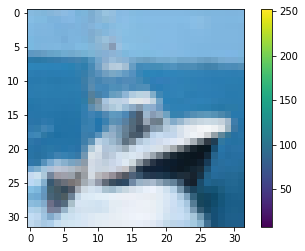

array([8], dtype=uint8)

In [ ]:
index = 8
plt.figure()
plt.imshow(train_images[index])
plt.colorbar()
plt.grid(False)
plt.show()

train_labels[index]

## EX10.

## EX11. 

In [ ]:
train_images = train_images / 255.0

## EX12.

In [ ]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(32 , 32, 3)),
  keras.layers.Dense(128, activation ='relu'),
  keras.layers.Dense(10, activation ='softmax')])

> The first layer in this network, Flatten, transforms the
format of the images from a two-dimensional array (32 * 32 pixels) to a one-
dimensional array (1024 pixels). Think of this layer as unstacking
rows of pixels in the image and lining them up. It only reformats the data.

> After, the network consists of a sequence of two
Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The
second (and last) layer is a 10-node softmax layer that returns an array of 10
probability scores that sum to 1. Each node contains a score that indicates the
probability that the current image belongs to one of the 10 classes.

##EX14.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9232 - accuracy: 0.3098
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7667 - accuracy: 0.3671
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7198 - accuracy: 0.3853
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6912 - accuracy: 0.3976
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6731 - accuracy: 0.4029
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6579 - accuracy: 0.4095
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6442 - accuracy: 0.4149
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6324 - accuracy: 0.4188
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6227 - accuracy: 0.4214
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.609

##EX15.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 233.1409 - accuracy: 0.3668 - 689ms/epoch - 2ms/step


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 233.1409 - accuracy: 0.3668


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

## EX16. 

In [ ]:
predictions = model.predict(test_images)

In [ ]:
print(f"First prediction : {predictions[0]} \n- Predicted label : {np.argmax(predictions[0])} \n- Observed label : {test_labels[0][0]}")

First prediction : [0.0000000e+00 0.0000000e+00 0.0000000e+00 2.9529635e-23 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00] 
- Predicted label : 8 
- Observed label : 3


##EX17.

In [ ]:
def checking(preds):
  for el in preds:
    

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)